In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, roc_curve, precision_score, f1_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

import sys
sys.path.append('K:\\MIFI-github\\MIFI_course_work_CML')
from modules.add_binar_classific_function import compare_models_binar_classific

In [5]:

# Загрузка датасета
df = pd.read_csv('K:\\MIFI-github\\MIFI_course_work_CML\\Data\\dataset_SI_const.csv')

c:\Users\Net Whisper\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\Net Whisper\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Net Whisper\AppData\Local\Programs\Python\Python310\lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
c:\Users\Net Whisper\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(



=== Без снижения размерности ===

LogisticRegression:
  Лучшие параметры: {'C': 0.1}
  Accuracy: 0.662
  Precision: 0.534
  Recall: 0.431
  F1: 0.477
  ROC AUC: 0.654

DecisionTree:
  Лучшие параметры: {'max_depth': 3}
  Accuracy: 0.716
  Precision: 0.742
  Recall: 0.319
  F1: 0.447
  ROC AUC: 0.667

RandomForest:
  Лучшие параметры: {'max_depth': 10, 'n_estimators': 100}
  Accuracy: 0.731
  Precision: 0.667
  Recall: 0.500
  F1: 0.571
  ROC AUC: 0.737

CatBoost:
  Лучшие параметры: {'depth': 4, 'learning_rate': 0.01}
  Accuracy: 0.726
  Precision: 0.667
  Recall: 0.472
  F1: 0.553
  ROC AUC: 0.753

MLPClassifier:
  Лучшие параметры: {'hidden_layer_sizes': (100, 50), 'max_iter': 500}
  Accuracy: 0.697
  Precision: 0.580
  Recall: 0.556
  F1: 0.567
  ROC AUC: 0.689

SVC:
  Лучшие параметры: {'C': 1, 'kernel': 'rbf'}
  Accuracy: 0.706
  Precision: 0.638
  Recall: 0.417
  F1: 0.504
  ROC AUC: 0.681

=== PCA ===

LogisticRegression:
  Лучшие параметры: {'C': 10}
  Accuracy: 0.677
  Precis

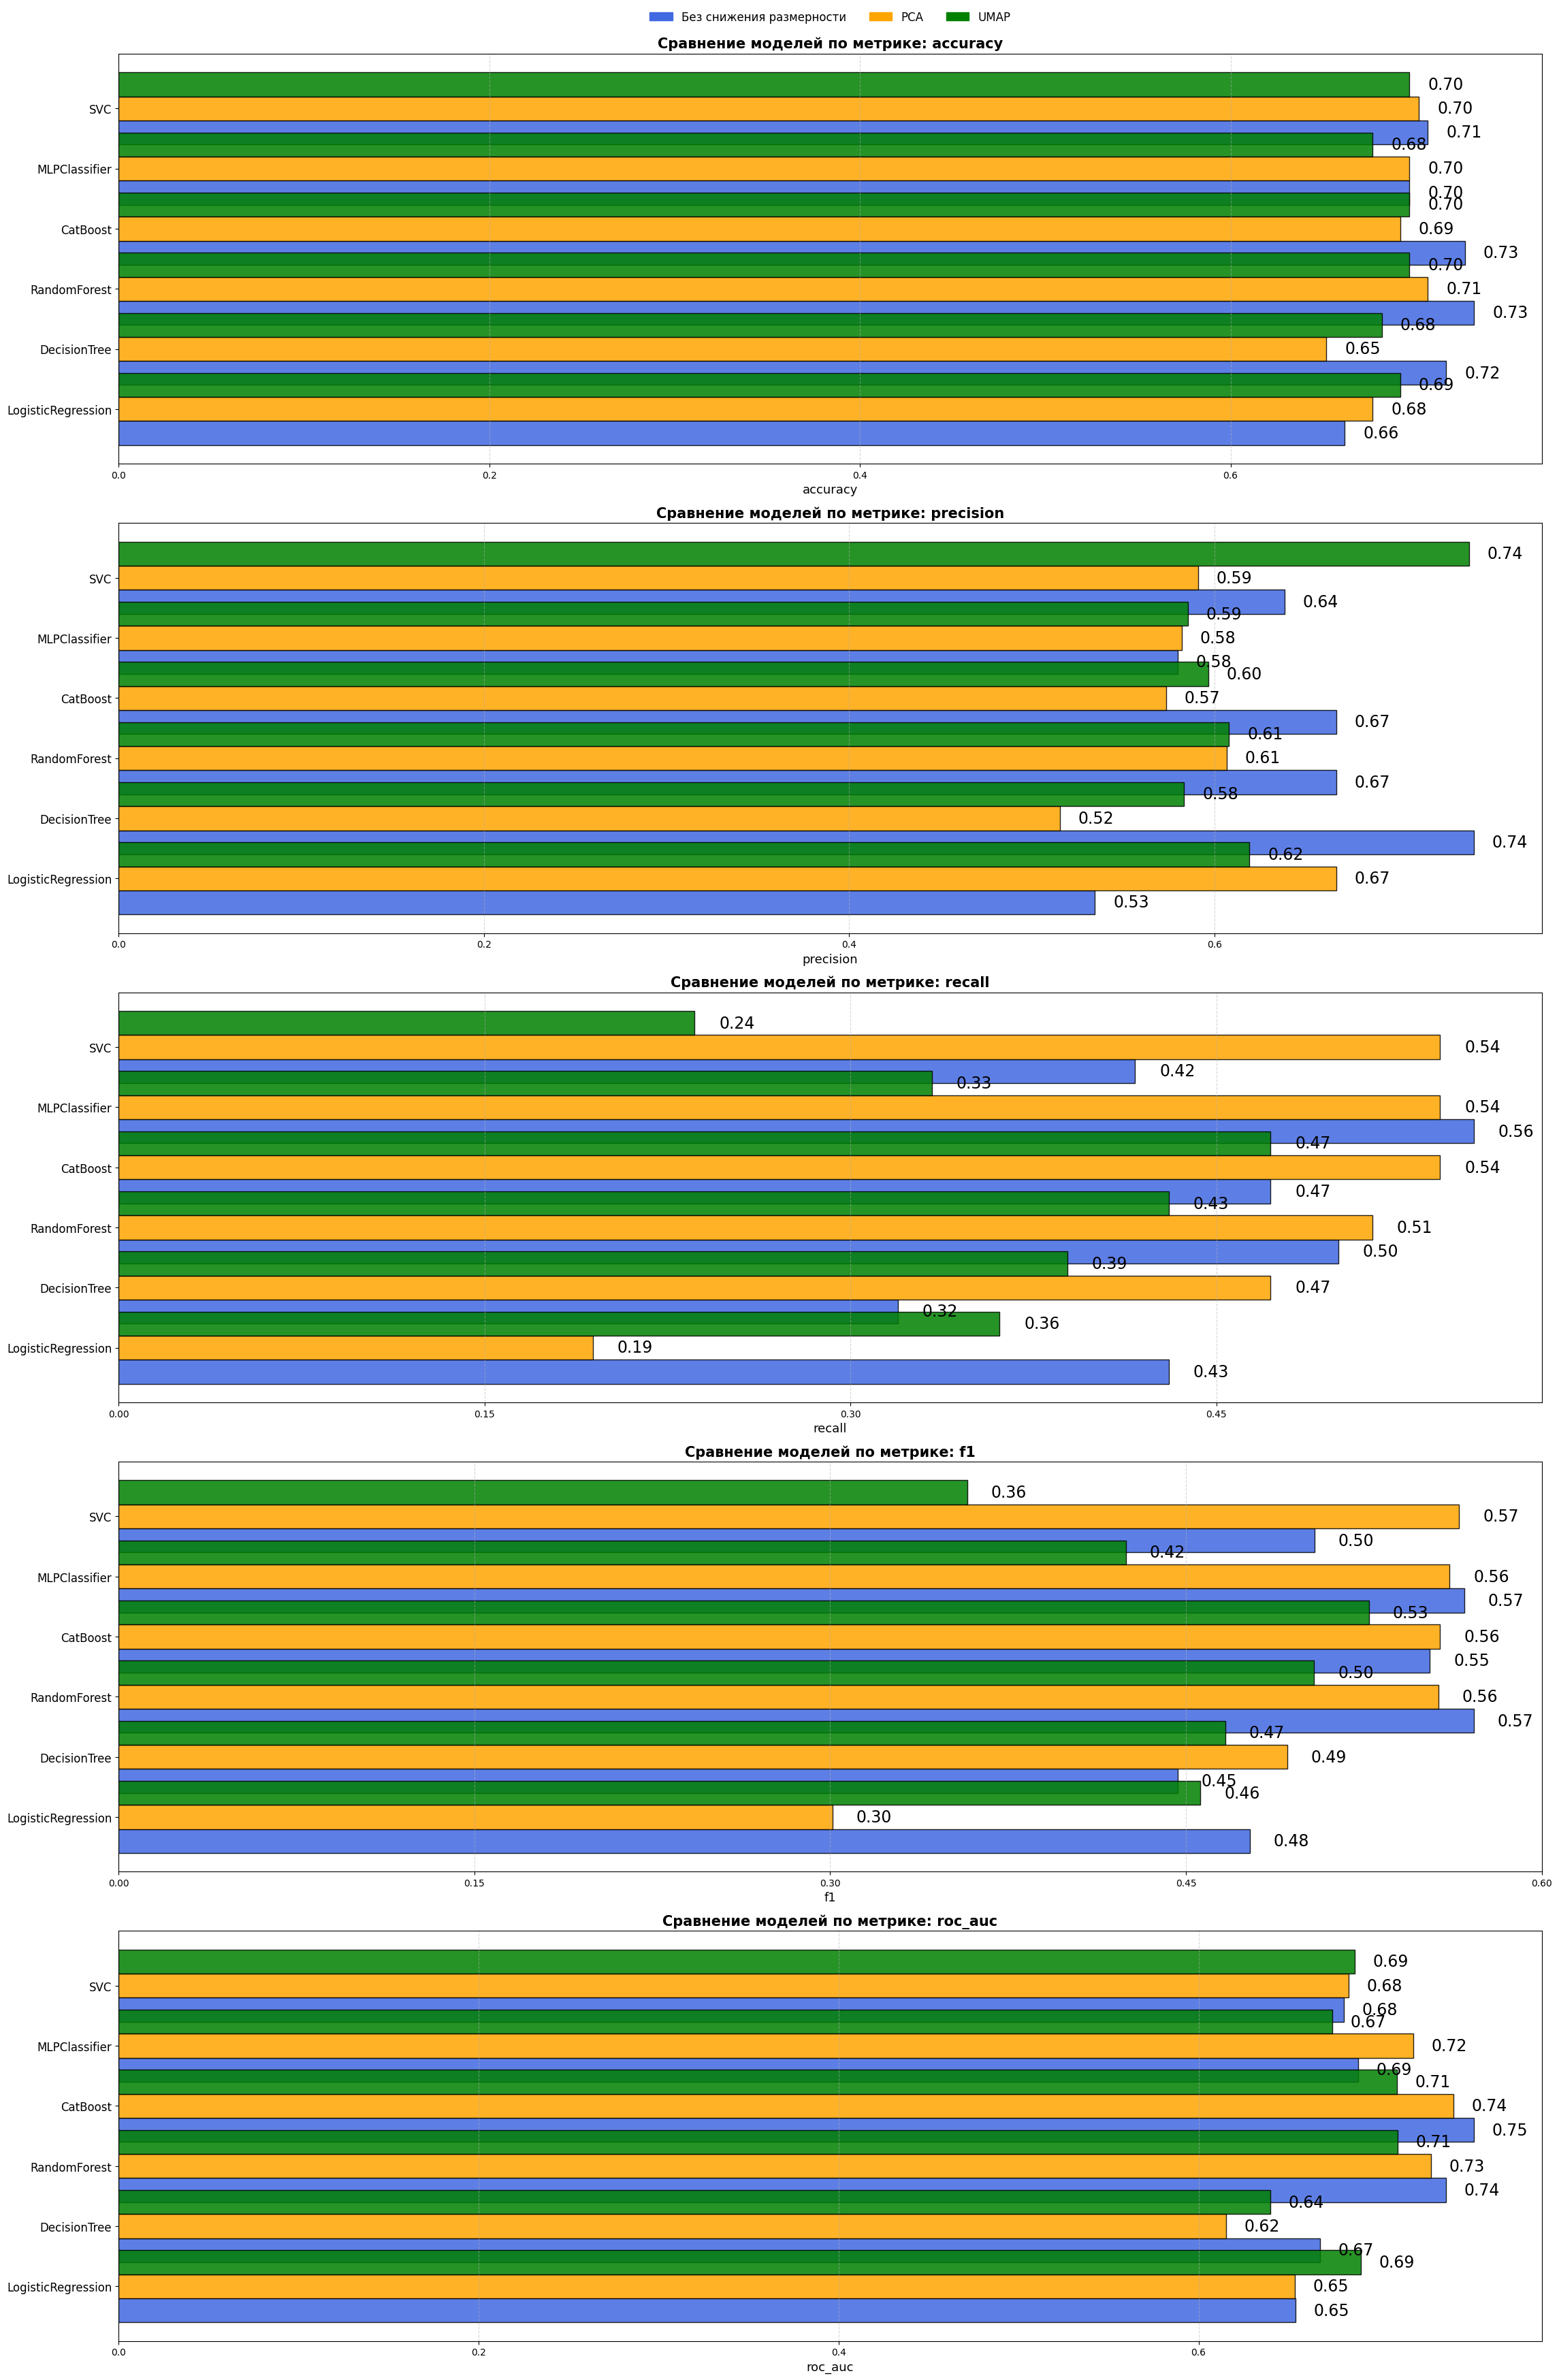

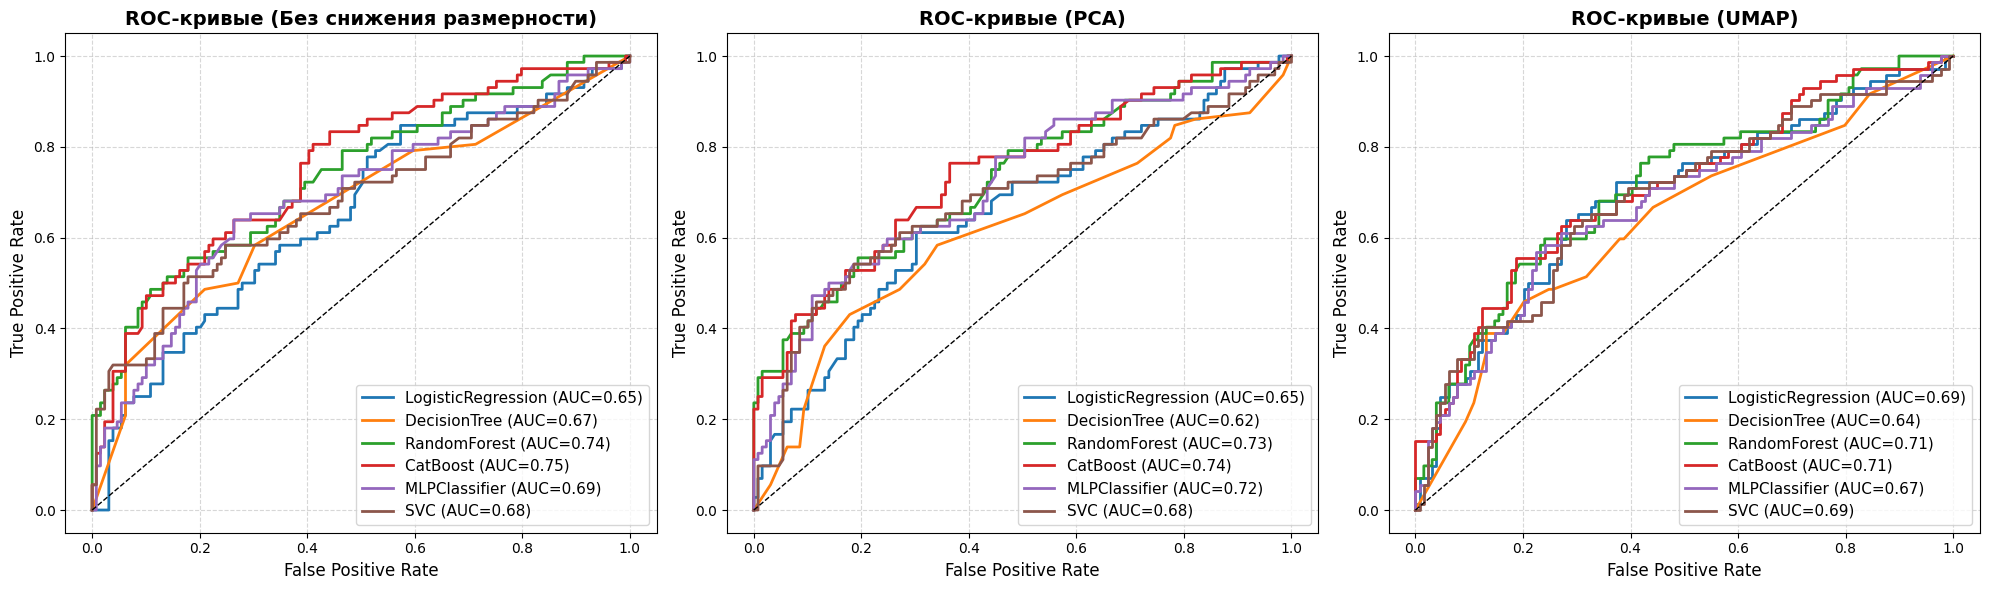

In [6]:
def compare_models_binar_classific(
    df, 
    target_col='SI_CONST', 
    test_size=0.2, 
    random_state=42, 
    n_components=15,
    **kwargs
):
    X = df.drop(columns=[target_col])
    y = df[target_col]
    
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, 
        test_size=test_size, 
        random_state=random_state,
        stratify=y
    )
    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    pca = PCA(n_components=n_components)
    X_train_pca = pca.fit_transform(X_train_scaled)
    X_test_pca = pca.transform(X_test_scaled)
    
    models = {
        'Logistic Regression': LogisticRegression(random_state=random_state),
        'Random Forest': RandomForestClassifier(random_state=random_state),
        'SVM': SVC(random_state=random_state, probability=True)
    }
    
    results = {}
    for name, model in models.items():
        model.fit(X_train_pca, y_train)
        y_pred = model.predict(X_test_pca)
        y_proba = model.predict_proba(X_test_pca)[:, 1]
        
        results[name] = {
            'Accuracy': accuracy_score(y_test, y_pred),
            'F1-score': f1_score(y_test, y_pred),
            'ROC-AUC': roc_auc_score(y_test, y_proba)
        }
    
    return pd.DataFrame(results).T